In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
bos = pd.DataFrame(boston.data) #creating dataframe in spread sheet style format

In [6]:
print(bos.head(10)) #gives top 10 rows of data set from each column

         0     1     2    3      4      5      6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575   65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421   78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185   61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998   45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147   54.2  6.0622  3.0  222.0  18.7   
5  0.02985   0.0  2.18  0.0  0.458  6.430   58.7  6.0622  3.0  222.0  18.7   
6  0.08829  12.5  7.87  0.0  0.524  6.012   66.6  5.5605  5.0  311.0  15.2   
7  0.14455  12.5  7.87  0.0  0.524  6.172   96.1  5.9505  5.0  311.0  15.2   
8  0.21124  12.5  7.87  0.0  0.524  5.631  100.0  6.0821  5.0  311.0  15.2   
9  0.17004  12.5  7.87  0.0  0.524  6.004   85.9  6.5921  5.0  311.0  15.2   

       11     12  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
5  394.12   5.21  
6  395.6

In [8]:
bos.columns = boston.feature_names

In [9]:
boston.feature_names #names of the each column

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
bos['price'] = boston.target # creates a column called price and appends it to the end look at output of result below and the data would be from boston.target

In [12]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [17]:
Y = bos['price']

In [18]:
X = bos.drop('price',axis = 1)

In [19]:
print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [23]:
#price = intercept + B1*CRIM + B2*Zn...

In [22]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [ ]:
#10
#a = 1,2,3,4,5,6,7,8,9,10
#random(0.2,a,seed= 4)
#7,4

In [25]:
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size = 0.33, random_state = 5)

In [26]:
print(X_train.shape)# prints the dimensions of each dataset
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [29]:
lm = LinearRegression()

In [32]:
a = lm.fit(X_train, Y_train)

In [34]:
Y_train_pred = lm.predict(X_train)

In [36]:
Y_test_pred = lm.predict(X_test)

In [37]:
df=pd.DataFrame(Y_test_pred,Y_test)
print (df)

               0
price           
37.6   37.467236
27.9   31.391547
22.6   27.120196
13.8    6.468433
35.2   33.629667
...          ...
14.4    9.718369
35.4   34.705200
25.3   25.704102
18.3   20.154309
16.6   15.394658

[167 rows x 1 columns]


In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_test_pred)
print(mse)

28.5304587659747


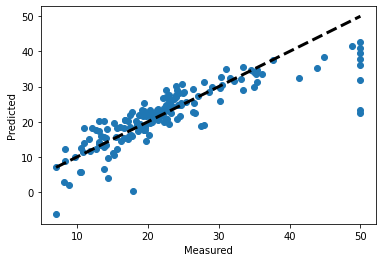

In [39]:
fig, ax = plt.subplots()
ax.scatter(Y_test,Y_test_pred)
ax.plot([Y_test.min(),Y_test.max()], [Y_test.min(),Y_test.max()], 'k--',lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()